In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import density_plot
from config import plot_path, parameter, data_path
import runner

In [2]:
Omega_a_h_sq_harm, theta_i_s, f_a_s = runner.load_data(data_path + "/harmonic.npz")

theta_i_index = 0
Omega_unit = 0.004
Omega = Omega_a_h_sq_harm[theta_i_index, :] / Omega_unit
f_a_unit = 1e28
f_a = f_a_s / f_a_unit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


A = -0.242354677746 +/- 0.0133575840607 p = 1.17771942963 +/- 0.00194292773365
B = 1.06461416381 +/- 0.000193513961513 a = 1.86935437284 +/- 0.111778865401 q = 1.52723312892 +/- 0.00060184681972 r = 1.27781538454 +/- 0.0158429713792 fu =  0.0216448080955 +/- 0.00187213072474
7/6 = 1.1666666666666667 3/2 = 1.5


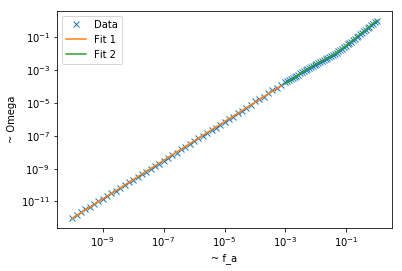

Text(0,0.5,'relative error')

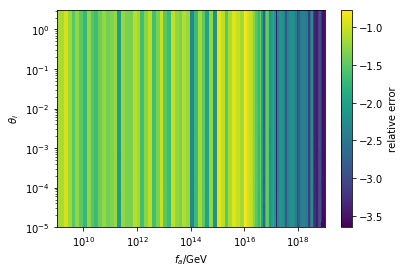

In [3]:
fs = 1e-3

F = lambda log_f, log_A, p: log_A + p * log_f
G = lambda f, B, a, q, r, fu: B * f ** ((r + q * (f / fu)**a) / (1 + (f / fu)**a))

f_a_1st = f_a[f_a < fs]
f_a_2nd = f_a[f_a >= fs]
Omega_1st = Omega[f_a < fs]
Omega_2nd = Omega[f_a >= fs]

(log_A, p), cov = opt.curve_fit(F, np.log10(f_a_1st), np.log10(Omega_1st), p0=(1, 7/6))
log_A_err, p_err = np.diag(np.sqrt(cov))

(B, a, q, r, fu), cov = opt.curve_fit(G, f_a_2nd, Omega_2nd, p0=(0.9, 1, 3/2, 1, 1e-1))
B_err, a_err, q_err, r_err, fu_err = np.sqrt(np.diag(cov))

print("A =", log_A, "+/-", log_A_err, "p =", p, "+/-", p_err)
print("B =", B, "+/-", B_err, "a =", a, "+/-", a_err, "q =", q, "+/-", q_err, "r =", r, "+/-", r_err, "fu = ",
     fu, "+/-", fu_err)                                
print("7/6 =", 7/6, "3/2 =", 3/2)

plt.loglog(f_a, Omega, "x", label="Data")
plt.loglog(f_a_1st, 10**F(np.log10(f_a_1st), log_A, p), label="Fit 1")
plt.loglog(f_a_2nd, G(f_a_2nd, B, a, q, r, fu), label="Fit 2")
plt.legend()
plt.xlabel("~ f_a")
plt.ylabel("~ Omega")
plt.show()

F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
def fn(f):
    return np.where(f < fs, 10**F(np.log10(f), log_A, p), G(f, B, a, q, r, fu))
Omega_a_h_sq_harm_fit = fn(F_A / f_a_unit) * Omega_unit * THETA_I**2 / theta_i_s[theta_i_index]**2
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")